In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt 

In [31]:
df=pd.read_csv("datasets/crime.csv")

In [32]:
df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [33]:
x=df.iloc[:,1:]

In [34]:
sc=StandardScaler()#escalador , estandarizador

In [35]:
sc.fit(x)#ajusta los parametros de media y desviacion estandar

StandardScaler()

In [36]:
x_norm=sc.transform(x)#normaliza los datos ,devuelve un dataframe

procedemos a realizar el metodo del codo para establecer los el valor de agrupamiento "k", el valor de semilla  (randon_state) es para poder reproducir el experimento y obtener los mismos resultados

In [38]:
clusters=np.arange(2,10)

In [40]:
#itero una lista de clusters para poder obtener la inercias de cada uno
inercias =[]
for k in clusters :
    #con el fit aprende los centroides
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(x_norm)
    inercias.append(kmeans.inertia_)

E:\softwares\Anaconda\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\softwares\Anaconda\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\softwares\Anaconda\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\softwares\Anaconda\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory le

In [41]:
eva=pd.DataFrame({"k":clusters,"inercia":inercias})

<Axes: xlabel='k', ylabel='inercia'>

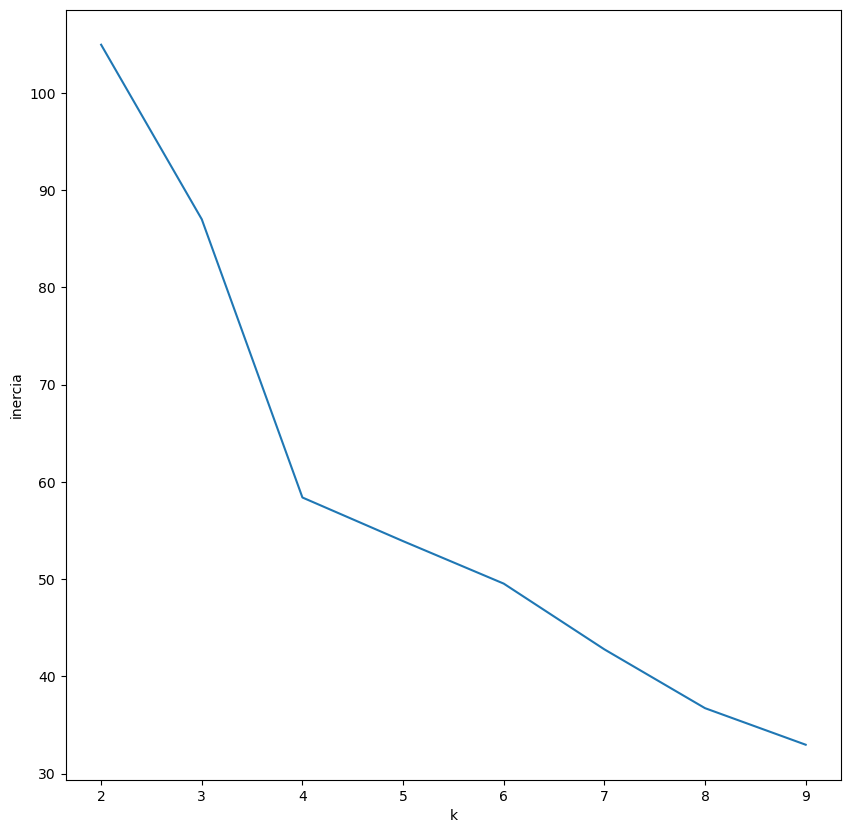

In [42]:
#plot para ver el metodo del codo y determinar el valor K
fig,ax=plt.subplots(figsize=(10,10))
sns.lineplot(data=eva,x="k",y="inercia" )

In [44]:
kmeans=KMeans(n_clusters=4,random_state=0) # establece el numero de iteraciones

In [45]:
kmeans.fit(x_norm)#aprende los centroides

E:\softwares\Anaconda\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\softwares\Anaconda\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [46]:
kmeans.cluster_centers_#muestra los centroides encontrados

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669]])

In [47]:
kmeans.labels_#muestra los labels, las etiquetas de cada una de nuestras observaciones

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0])

vamos a agregar los labels a nuestro dataset original para poder observar a que grupo pertenecen cada una de las observaciones, para poder realizar un analisis del data set

In [48]:
df["cluster"]=kmeans.labels_

In [49]:
df.head()

,State,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,1


In [ ]:
sns.pairplot(df,hue="cluster",palette="tab10")

In [ ]:
df.loc[df["cluster"]==0]#filtrar por clusters 

In [ ]:
sns.boxplot(x="cluster",y="Murder",data=df)#analisis por grupos